
### Bagging vs Boosting

Pra lembrar as principais diferenças entre os dois métodos de ensemble que estudamos:

<img src=https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg width=600>

## Gradient boosting

Além dos métodos que estudamos, há ainda outras classes de métodos de ensemble!

Em particular, a classe de modelos que se utilizam do procedimento de **gradient boosting**.

O gradient boosting também é baseado no princípio de boosting (utilização de weak learners sequencialmente adicionados de modo a **sequencialmente minimizar os erros cometidos**).

<img src=https://miro.medium.com/max/788/1*pEu2LNmxf9ttXHIALPcEBw.png width=600>

Mas este método implementa o boosting através de um **gradiente** explícito.

A ideia é que caminhemos na direção do **erro mínimo** de maneira iterativa **passo a passo**.

Este caminho se dá justamente pelo **gradiente** da **função de custo/perda**, que mede justamente os erros cometidos.

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif width=400>

### Gradiente descendente


Deixei em ênfase porque este será um método de **enorme importância** no estudo de redes neurais (e é, em geral, um método de otimização muito utilizado).

O objetivo geral do método é bem simples: determinar quais são os **parâmetros** da hipótese que minimizam a função de custo/perda. Para isso, o método "percorre" a função de erro, indo em direção ao seu mínimo (e este "caminho" feito na função se dá justamente pela **determinação iterativa dos parâmetros**, isto é, **a cada passo, chegamos mais perto dos parâmetros finais da hipótese**, conforme eles são ajustados aos dados.

> **Pequeno interlúdio matemático:** o gradiente descendente implementado pelo gradient boosting é, na verdade, um **gradiente descendente funcional**, isto é, desejamos encontrar não um conjunto de parâmetros que minimiza o erro, mas sim **introduzir sequencialmente weak learners (hipótese simples) que minimizam o erro**. Desta forma, o gradient boosting minimiza a função de custo ao ecolher iterativamente hipóteses simples que apontam na direção do mínimo, neste espaço funcional.

Apesar do interlúdio acima, não precisamos nos preocupar muito com os detalhes matemáticos: o que importa é entender que no caso do gradient boosting, há alguns pontos importantes:

- Uma **função de custo/perda (loss)** é explicitamente minimizada por um procedimento de gradiente;

- O gradiente está relacionado com o procedimento de **encadeamento progressivo entre weak learners**, seguindo a ideia do boosting.

Pra quem quiser saber um pouco mais de detalhes (e se aventurar na matemática), sugiro [este post](https://www.gormanalysis.com/blog/gradient-boosting-explained/) ou então [este site](https://explained.ai/gradient-boosting/), que contém vários materiais ótimos para entender o método com todos os detalhes matemáticos.

Os [vídeos do StatQuest](https://www.youtube.com/playlist?list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6) também são uma boa referência!



As classes do sklearn são:

- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

E os principais hiperparâmetros a serem ajustados são:

- `n_estimators` : novamente, o número de weak learners encadeados.

- `learning_rate` : a constante que multiplica o gradiente no gradiente descendente. Essencialmente, controla o "tamanho do passo" a ser dado em direção ao mínimo.

Segundo o próprio [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting): "*Empirical evidence suggests that small values of `learning_rate` favor better test error. The lireature recommends to set the learning rate to a small constant (e.g. `learning_rate <= 0.1`) and choose `n_estimators` by early stopping.*"

Ainda sobre a learning rate, as ilustrações a seguir ajudam a entender sua importância:

<img src=https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png width=700>

<img src=https://cdn-images-1.medium.com/max/1440/0*A351v9EkS6Ps2zIg.gif width=500>

## Inicio Aprofundamento GB

Imagine que vamos usar um modelo bem simples, apenas para entender como o gradiente descendente funciona. O modelo só possui um parâmetro que é um valor constante:

$\theta = C$

O que o gradiente descendente faz é encontrar o conjunto de parâmetros que leva ao menor valor dessa função. O ponto de mínimo. Podemos então criar uma função de erro, que define o quão ruim está o nosso modelo em função dos parâmetros do modelo. 

Se usarmos o gradiente descendente para minimizar essa função de erro, encontraremos o conjunto de parâmetros que leva ao menor erro do modelo. Uma função de erro bastante usada é o **erro médio quadrático**.

$L(\theta, Y) = \frac{1}{n}\sum_{i=1}^n(y_i- \theta)^2$

Para simplificar mais vamos considerar nossos dataset igual a:
$y=[12,13,15,16,17]$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def mse(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

def points_and_loss(y_vals, xlim, loss_fn):
    thetas = np.arange(xlim[0], xlim[1] + 0.01, 0.05)
    losses = [loss_fn(theta, y_vals) for theta in thetas]
    
    plt.figure(figsize=(9, 2))
    
    ax = plt.subplot(121)
    sns.rugplot(y_vals, height=0.3, ax=ax)
    plt.xlim(*xlim)
    plt.title('Points')
    plt.xlabel('Tip Percent')
    
    ax = plt.subplot(122)
    plt.plot(thetas, losses)
    plt.xlim(*xlim)
    plt.title(loss_fn.__name__)
    plt.xlabel(r'$ \theta $')
    plt.ylabel('Loss')
    plt.legend()

In [ ]:
pts = np.array([12, 13, 15, 16, 17])
points_and_loss(pts, (11, 18), mse)

Vamos fazer uma função que percorre todos os valores de $\theta$, calcula o erro para cada um deles e retorna o $\theta$ com o menor erro:

In [ ]:
def simple_minimize(loss_fn, dataset, thetas):
    losses = [loss_fn(theta, dataset) for theta in thetas]
    return thetas[np.argmin(losses)]

In [ ]:
dataset = np.array([12, 13, 15, 16, 17])
thetas = np.arange(12, 18, 0.1)

simple_minimize(mse, dataset, thetas)

In [ ]:
thetas

Agora usando todo o dataset:

In [ ]:
tips = sns.load_dataset('tips')
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100
tips.head()

In [ ]:
points_and_loss(tips['pcttip'], (11, 20), mse)

In [ ]:
simple_minimize(mse, tips['pcttip'], thetas)

In [ ]:
sns.distplot(tips['pcttip'], bins=50);

### Problemas com simple minimize?

*  Como testar todos os valores de $\theta$
*  Como definir o melhor incremento?

### Gradiente Descendente

In [ ]:
def grad_mse(theta, y_vals):
    return -2 * np.mean(y_vals - theta)

def plot_loss(y_vals, xlim, loss_fn):
    thetas = np.arange(xlim[0], xlim[1] + 0.01, 0.05)
    losses = [loss_fn(theta, y_vals) for theta in thetas]
    
    plt.figure(figsize=(5, 3))
    plt.plot(thetas, losses, zorder=1)
    plt.xlim(*xlim)
    plt.title(loss_fn.__name__)
    plt.xlabel(r'$ \theta $')
    plt.ylabel('Loss')
    
def plot_theta_on_loss(y_vals, theta, loss_fn, **kwargs):
    loss = loss_fn(theta, y_vals)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([theta], [loss], **{**default_args, **kwargs})

def plot_tangent_on_loss(y_vals, theta, loss_fn, eps=1e-6):
    slope = ((loss_fn(theta + eps, y_vals) - loss_fn(theta - eps, y_vals)) / (2 * eps))
    xs = np.arange(theta - 1, theta + 1, 0.05)
    ys = loss_fn(theta, y_vals) + slope * (xs - theta)
    plt.plot(xs, ys, zorder=3, c=sns.xkcd_rgb['green'], linestyle='--')

In [ ]:
pts = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
plot_loss(pts, (11, 18), mse)
plot_theta_on_loss(pts, 12, mse)

In [ ]:
pts = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
plot_loss(pts, (11, 18), mse)
plot_tangent_on_loss(pts, 12, mse)

In [ ]:
pts = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
plot_loss(pts, (11, 18), mse)
plot_tangent_on_loss(pts, 16.5, mse)

Quando a inclinação da reta é negativa, aumentar $\theta$ diminui o erro, já quando a inclinação é positiva, diminuir o $\theta$ diminui o erro. Podemos escrever esse comportamento matematicamente como:

$\theta^{(t+1)} = \theta^{(t)} - \frac{\partial}{\partial \theta} L(\theta^{(t)}, \textbf{y})$

Desenvolvendo essa equação temos: 

$
\begin{split}
\begin{aligned}
L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2\\
\frac{\partial}{\partial \hat{\theta}} L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n} -2(y_i - \theta) \\
&= -\frac{2}{n} \sum_{i = 1}^{n} (y_i - \theta) \\
\end{aligned}
\end{split}
$

Quanto $\theta^{(t)} = 12$, podemos calcular $-\frac{2}{n} \sum_{i = 1}^{n} (y_i - \theta) = -5.32$. Então $\theta^{(t+1)} = 12 - (-5.32) = 17.32$  

In [ ]:
grad_mse(12, pts)

In [ ]:
pts = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
plot_loss(pts, (11, 18), mse)
plot_theta_on_loss(pts, 12, mse, c='none',
                   edgecolor=sns.xkcd_rgb['green'], linewidth=2)
plot_theta_on_loss(pts, 17.32, mse)

### Taxa de aprendizagem

Apesar de $\theta^{t+1}$ ter dado um passo na direção correta, ele terminou indo muito além do mínimo. Podemos resolver esse problema multiplicando por uma constante pequena $\alpha$, por exemplo usando $\alpha = 0.3$

$\theta^{(t+1)} = \theta^{(t)} - \alpha \cdot \frac{\partial}{\partial \theta} L(\theta^{(t)}, \textbf{y})$

In [ ]:
def plot_one_gd_iter(y_vals, theta, loss_fn, grad_loss, alpha=0.3):
    new_theta = theta - alpha * grad_loss(theta, y_vals)
    plot_loss(pts, (11, 18), loss_fn)
    plot_theta_on_loss(pts, theta, loss_fn, c='none',
                       edgecolor=sns.xkcd_rgb['green'], linewidth=2)
    plot_theta_on_loss(pts, new_theta, loss_fn)
    print(f'old theta: {theta}')
    print(f'new theta: {new_theta}')
    
plot_one_gd_iter(pts, 12, mse, grad_mse)

In [ ]:
plot_one_gd_iter(pts, 13.60, mse, grad_mse)

In [ ]:
plot_one_gd_iter(pts, 14.24, mse, grad_mse)

In [ ]:
plot_one_gd_iter(pts, 14.49, mse, grad_mse)

### Algoritmo do Gradiente Descendente

1. Escolha o valor inicial de $\theta$
2. Calcule a tangente com: $\theta - \alpha \cdot \frac{\partial}{\partial \theta} L(\theta, \textbf{y})$ e atualize o novo $\theta$ com esse valor
3. Repita até que $\theta$ não se altere mais.

Uma outra notação comum para equação do gradiente é essa:
$ \theta^{(t+1)} = \theta^{(t)} - \alpha \cdot \nabla_\theta L(\theta^{(t)}, \textbf{y}) $

In [ ]:
def minimize(loss_fn, grad_loss_fn, dataset, alpha=0.2, progress=True):
    theta = 0
    while True:
        if progress:
            print(f'theta: {theta:.2f} | loss: {loss_fn(theta, dataset):.2f}')
        gradient = grad_loss_fn(theta, dataset)
        new_theta = theta - alpha * gradient
        
        if abs(new_theta - theta) < 0.001:
            return new_theta
        
        theta = new_theta

In [ ]:
theta = minimize(mse, grad_mse, np.array([12.1, 12.8, 14.9, 16.3, 17.2]))
print(f'Minimizing theta: {theta}')

### Funções Convexas



Considere as iterações do gradiente descendente nessa função:

### Iteração 1:

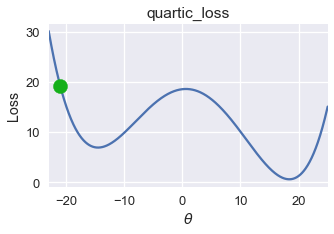

### Iteração 2:

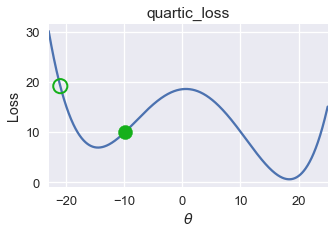

### Iteração 3:

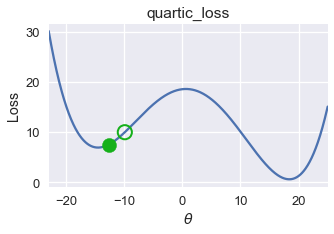

### Iteração 4:

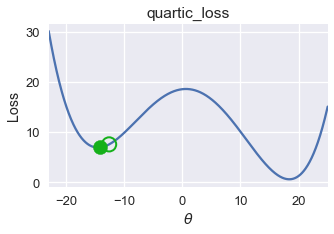

## Iteração 5:

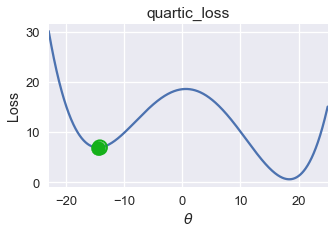

Note que nesse exemplo o gradiente descentente encontrou um **mínimo local**, que não necessariamente é o **mínimo global**. Por outro lado, se a função de erro possui mínimo local que também é o mínimo global, o gradiente descendente sempre vai encontrar o mínimo.

O conjunto de funções em que o mínimo local também é o mínimo global também é conhecido como **funções convexas**. Podemos identificar uma função convexa se, ao traçarmos uma linha que ligando dois pontos da função, uma parte dela fique acima da linha:

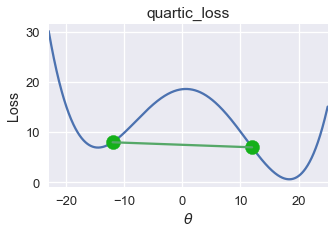

Em contraste, o MSE para o nosso modelo constante é convexa:

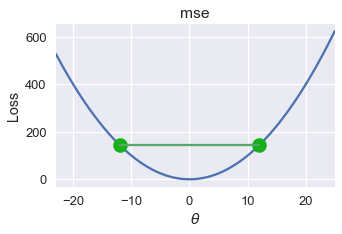


--------------------------------

Vamos treinar nosso classificador baseline de gradient boosting:

In [6]:
# EXTRA

import sklearn
print(sklearn.__version__)

import pandas as pd
print(pd.__version__)

1.3.2
2.1.2


In [12]:
# importar as bibliotecas
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt 

In [13]:
# copiando o pipeline da aula anterior
def pipe_pre_process_german():
    #carregar os dados -> data ingestion
    df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

    # Definir quem são as variáveis independentes e a variável dependente
    X = df.drop(columns="Risk")
    y = df["Risk"]

    # Particiona os dados a fim de poder avaliar o modelo ao fim do processo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # EDA -> Preprocessamento de dados
    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                  ("min_max", MinMaxScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                  ("onehot", OneHotEncoder())])

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return pre_processador, X_train, y_train, X_test, y_test

In [14]:
def metricas_classificacao(estimator):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    


Métricas de avaliação de treino:
[[161  79]
 [ 13 547]]


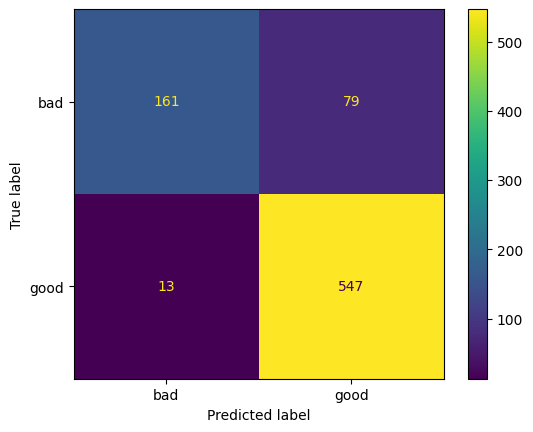

              precision    recall  f1-score   support

         bad       0.93      0.67      0.78       240
        good       0.87      0.98      0.92       560

    accuracy                           0.89       800
   macro avg       0.90      0.82      0.85       800
weighted avg       0.89      0.89      0.88       800


Métricas de avaliação de teste:
[[ 28  32]
 [ 12 128]]


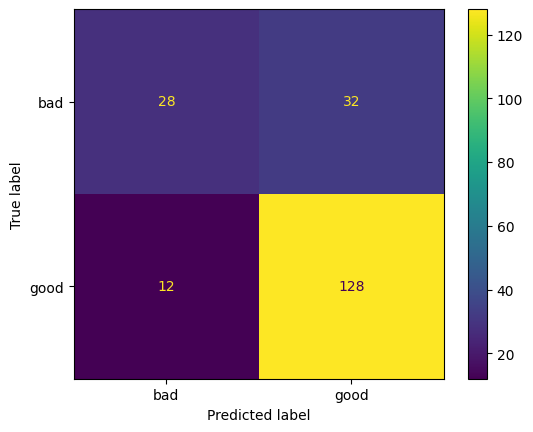

              precision    recall  f1-score   support

         bad       0.70      0.47      0.56        60
        good       0.80      0.91      0.85       140

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.71       200
weighted avg       0.77      0.78      0.77       200



In [15]:
pre_processador, X_train, y_train, X_test, y_test = pipe_pre_process_german()
# Pipeline final
pipe_gb = Pipeline([("pre_processador", pre_processador),('gb', GradientBoostingClassifier(random_state=42))])
# loss='log_loss', learning_rate=0.1, n_estimators=100

# treinar o modelo
pipe_gb.fit(X_train, y_train)
# avaliar o modelo

metricas_classificacao(pipe_gb)

Alterar alguns hiperâmetros:

learning_rate=0.1 -> learning_rate=1


Métricas de avaliação de treino:
[[240   0]
 [  0 560]]


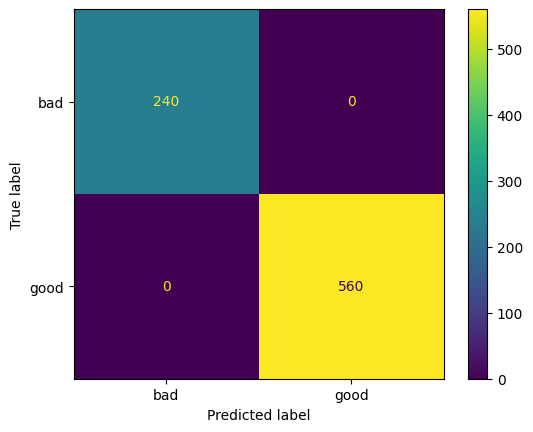

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       240
        good       1.00      1.00      1.00       560

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Métricas de avaliação de teste:
[[ 34  26]
 [ 20 120]]


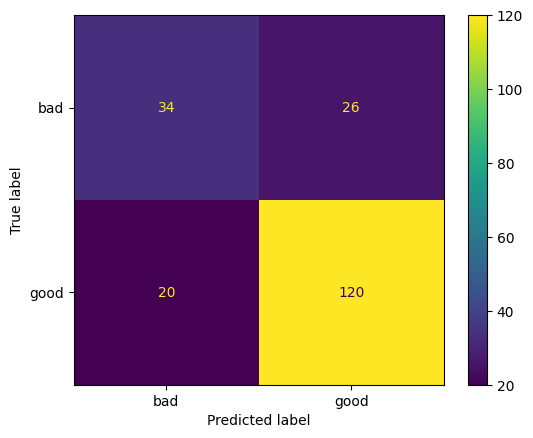

              precision    recall  f1-score   support

         bad       0.63      0.57      0.60        60
        good       0.82      0.86      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.71      0.72       200
weighted avg       0.76      0.77      0.77       200



In [16]:
pipe_gb = Pipeline([('pre_processador', pre_processador),('gb', GradientBoostingClassifier(random_state=420, learning_rate=1, n_estimators=100))])
# treinar o modelo
pipe_gb.fit(X_train, y_train)
# avaliar o modelo

metricas_classificacao(pipe_gb)

Alterar alguns hiperâmetros:

learning_rate=0.1 -> learning_rate=0.01


Métricas de avaliação de treino:
[[ 19 221]
 [  1 559]]


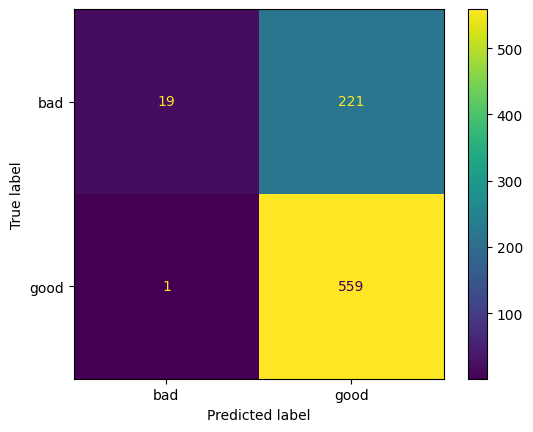

              precision    recall  f1-score   support

         bad       0.95      0.08      0.15       240
        good       0.72      1.00      0.83       560

    accuracy                           0.72       800
   macro avg       0.83      0.54      0.49       800
weighted avg       0.79      0.72      0.63       800


Métricas de avaliação de teste:
[[  5  55]
 [  0 140]]


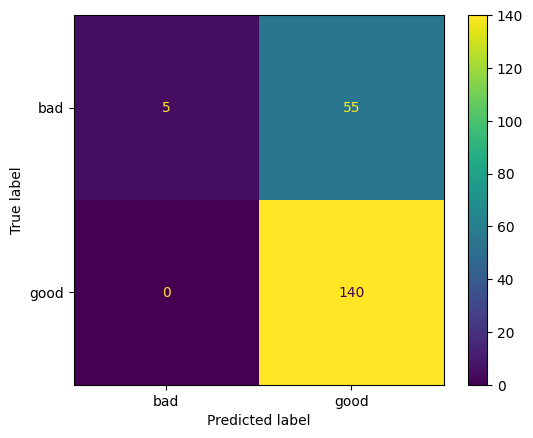

              precision    recall  f1-score   support

         bad       1.00      0.08      0.15        60
        good       0.72      1.00      0.84       140

    accuracy                           0.73       200
   macro avg       0.86      0.54      0.49       200
weighted avg       0.80      0.72      0.63       200



In [17]:
pipe_gb= Pipeline([('pre_processador', pre_processador), ('gb', GradientBoostingClassifier(random_state=420, learning_rate=0.01, n_estimators=100))])

# treinar o modelo
pipe_gb.fit(X_train, y_train)
# avaliar o modelo
metricas_classificacao(pipe_gb)


Claramente está dando um underfitting -> não convergiu (nesse caso, precisa de mais estimadores para chegar no ponto de mínimo)

Alterar alguns hiperâmetros:

learning_rate=0.1 -> learning_rate=0.01 (underfitting)

n_estimators=100 -> n_estimators=1000


Métricas de avaliação de treino:
[[156  84]
 [ 14 546]]


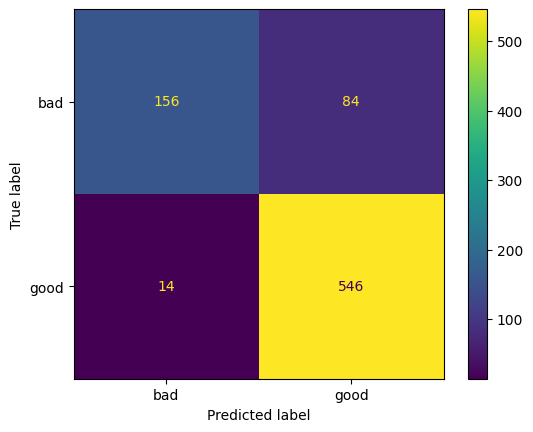

              precision    recall  f1-score   support

         bad       0.92      0.65      0.76       240
        good       0.87      0.97      0.92       560

    accuracy                           0.88       800
   macro avg       0.89      0.81      0.84       800
weighted avg       0.88      0.88      0.87       800


Métricas de avaliação de teste:
[[ 26  34]
 [ 13 127]]


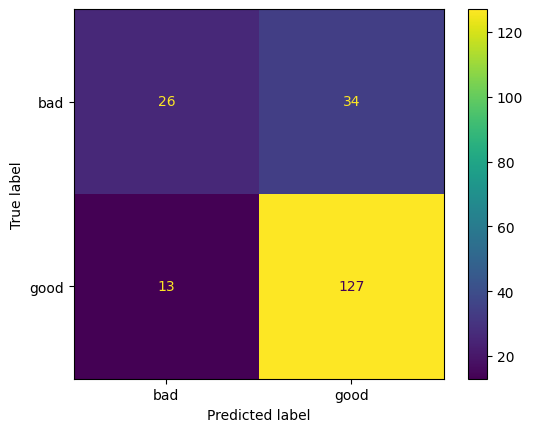

              precision    recall  f1-score   support

         bad       0.67      0.43      0.53        60
        good       0.79      0.91      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200



In [18]:
pipe_gb = Pipeline([("pre_processador", pre_processador),
                    ('gb', GradientBoostingClassifier(random_state=420, 
                                                      learning_rate=0.01, 
                                                      n_estimators=1000))])

# treinar o modelo
pipe_gb.fit(X_train, y_train)
# avaliar o modelo
metricas_classificacao(pipe_gb)

## XGBoost

O algoritmo GBoost foi desenvolvido como um projeto de pesquisa na Universidade de Washington. O projeto foi apresentado na Conferência SIGKDD em 2016 por Tianqi Chen e Carlos Guestrin e pôs fogo no parquinho do aprendizado de máquina. 

Desde que veio ao mundo, o XGBoost tem sido um vencedor de inúmeras competições Kaggle, mas também é destaque em aplicações de ponta na indústria. 

Hoje existe uma grande comunidade que mantém esse algoritmo. São cerca de 350 colaboradores e aproximadamente 3.600 commits no GitHub. 

Imagine que você seja um recrutador que é responsável por entrevistar vários candidatos. Cada etapa da evolução de algoritmos baseados em árvore pode ser vista como uma versão do processo seletivo.


*Decision Tree* : O recrutador possui uma determinada experiência com recrutamento e leva em consideração critérios como: nível de formação, anos de experiência, performance nas entrevistas, entre outras, para tomar a decisão de contratar ou não contratar. Mas a palavra final é dele.

*Bagging*: Agora imagine que em vez de um único recrutador, o processo seletivo contará com vários recrutadores, com backgrounds diferentes e cada um tem um voto que contribuirá na decisão final.

*Random Forest*: Parecido com o processo anterior, o Random Forest traz uma outra característica interessante a esse processo seletivo. Não só existirão diferentes recrutadores e eles terão um voto que será combinado, mas também cada recrutador avaliará o candidato em diferentes critérios.

*Boosting*: Esta é uma abordagem alternativa em que cada entrevistador altera os critérios de avaliação com base no feedback do entrevistador anterior. Isso "aumenta" a eficiência do processo de entrevista, implementando um processo de avaliação mais dinâmico.


*Gradient Boosting*:Um caso especial de *Boosting* onde os erros são minimizados pelo algoritmo de descida gradiente, por exemplo as consultorias se aproveitam do uso de cases para eliminar candidatos menos qualificados.


*XGBoost*: Pense no XGBoost como o Cristiano Ronaldo dopado. O Gradient Boosting combina otimizações de software e hardware para produir resultados superiores usando menos recurso de computação e menor tempo.

<img src="https://miro.medium.com/max/1400/1*U72CpSTnJ-XTjCisJqCqLg.jpeg" width="50%">

Conforme demonstrado no gráfico acima, o modelo XGBoost tem a melhor combinação de desempenho de previsão e tempo de processamento em comparação com outros algoritmos. Outros estudos de benchmarking rigorosos produziram resultados semelhantes. Não é à toa que o XGBoost é amplamente usado em competições recentes de Data Science.


Mesmo com todas essas características e benefícios e melhorias, fica o questionamento: Sempre devemos utilizar o XGBoost?

Quando se trata de Aprendizado de Máquina (ou mesmo de vida), não há almoço grátis. Como cientistas de dados, devemos testar todos os algoritmos possíveis para os dados disponíveis para identificar o algoritmo campeão. Além disso, escolher o algoritmo certo não é suficiente. Devemos também escolher a configuração correta do algoritmo para um conjunto de dados ajustando os hiperparâmetros. Além disso, existem várias outras considerações para escolher o algoritmo vencedor, como complexidade computacional, explicabilidade e facilidade de implementação. Este é exatamente o ponto onde o Machine Learning começa a se afastar da ciência para a arte. É alquimia algumas vezes.

---------------------------




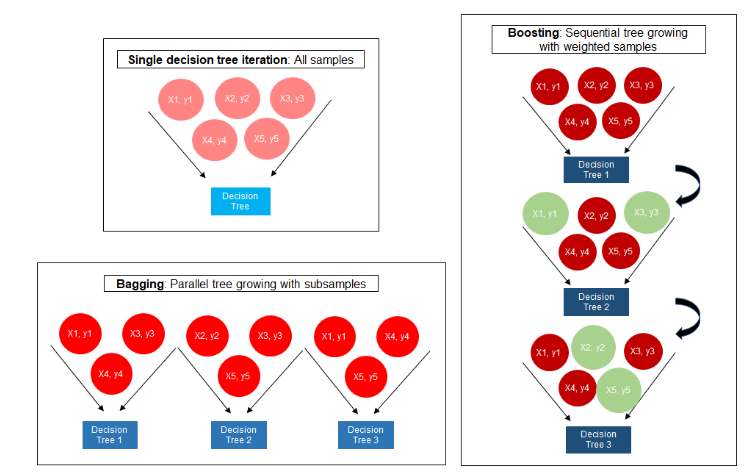

Este método nada mais é que um gradient boosting, mas com algumas importantes modificações que lhe conferem o título de "extreme"! Em particular, duas alterações merecem destaque:

- A adição de procedimentos de regularização (L1 e L2!), o que melhora consideravelmente sua capacidade de generalização;

- A utilização de derivadas de segunda ordem (Hessiano) para o procedimento de gradiente.

Para quem quiser se aventurar mais, sugiro algumas boas leituras:

- [Este](https://shirinsplayground.netlify.app/2018/11/ml_basics_gbm/), explica bem as particularidades do XGBoost, além de dar uma boa introdução ao gradient boosting (o código é em R, então pode ignorar essa parte hehe);

- [Este](https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb), introduz bem o método, enquanto enfativa suas particularidades, com alguns detalhes matemáticos;

- [Este](https://xgboost.readthedocs.io/en/latest/tutorials/model.html), da própria documentação da biblioteca, traz uma explicação legal, e com alguns detalhes matemáticos;

- [Este](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d), com uma discussão mais alto-nível (sem tantos detalhes) sobre o XGBoost e os motivos de seu sucesso.

Infelizmente, o sklearn não tem o XGBoost implementado :(

Mas, felizmente, existe uma biblioteca que o implementou, de maneira totalmente integrada ao sklearn!!

A biblioteca é a [XGBoost](https://xgboost.readthedocs.io/en/latest/).

Para instalar a biblioteca, o de sempre:

`!pip install xgboost`

https://xgboost.readthedocs.io/en/stable/python/python_api.html

Hiperparâmetros:

Vamos dividir os hiperparâmetros do XGBoost em algumas categorias:
    
   - Gerais
   - Boosting
   - Aprendizado
   
* Gerais:
    - `booster`: 
        Esse parâmetro nos ajuda a escolher qual weak learner usar. Basicamente existem 3 opções: gbtree, gblinear e dart. 
    - `verbosity`: Controla o monitoramento da execução; 0 (silent), 1(warning), 3(debug)
    - `nthread`: Indica o número de núcleos de processamento paralelo
* Boosting:
    Como o tree booster sempre performa melhor que o linear, vamos no ater aos hiperparâmetros desse booster.
    - ```eta```[default=0.3]: Também conhecido como learning_rate. Valores típicos vão de 0.01 a 0.2, mas o range ´ [0,1]. É analogo ao learning_rate do GBM.
    - ```gamma```[default=0]. Também conhecido como min_split_loss. Quanto maior, menos nós serão construídos. Range [0, inf]
    - ```max_depth```[default=6]: É o mesmo que no GBM. Define a máxima profundidade das árvores.Valores típicos estão entre 3-10
    - ```min_child_weight```[default=1]: É parecido com o min_child_leaf do GBM, mas é diferente. Aqui estamos somando os pesos das instâncias presentes em cada folha e não somente o número delas. Quanto maior for esse valor, mais conservador é o algoritmo em criar nós. Range [0, inf]
   - ```subsample```[default=1]: Percentual de observações que serãos selecionadas para o treinamento de cada weak learner. Valores pequenos levam a underfitting. Range (0,1]. Valores típicos estão entre [0.5, 1].
   - ```colsample_bytree, colsample_bylevel, colsample_bynode``` [default=1]: Esses hiperparâmetros possuem range de (0,1] e especificam a fração de colunas do dataset que será utilizada nos splits.
       - colsample_bytree: É o subsample de colunas usadas ao construir uma árvore. Esse subsampling ocorrerá a cada árvore construída.
       - colsample_bylevel: É o subsample usado em cada nível da árvore. A cada novo nível gerado, o subsampling é feito a partir das colunas iniciais.
       - colsample_bynode: É a fração de colunas usadas em cada split de nó. 
       
       Note que os parâmetros são cumulativos. Dessa forma, se escolhermos {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} em 80 features, o resultado é que das 100 features, apenas 10 serão usadas de fato em cada nó.
       
    - ```lambda``` [default=1]: Também chamado de reg_lambda. É a regularização L2.
    - ```alpha``` [default=0]: Também chamado de reg_alpha. É o termo de regularização L1.
    - ```tree_method```[default=auto]: É o algoritmo de construção utilizado. Pode ser approx, hist, gpu_hist, exact.
    - ```scale_pos_weigth```[default=1]: É usado em caso de desbalanceamento de classe. Vai ajudar a convergir mais rápido também. Um valor típico para considerar é: n_negative/n_positive


Para um aprofundamento: https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

* Aprendizado:
    Esses referem-se, basicamente, as métricas de performance e a loss do treinamento.
    - objective: Métrica que será usada para aprender
    - eval_metric: Métrica' usada na validação
    - seed: Número aleatório para garantir reprodutibilidade
    
    

------------------------------------------

In [ ]:
!pip install xgboost

In [20]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification, make_regression

X, y = make_classification(n_samples=100000, n_features=15, n_informative=5, n_redundant=0, n_classes=2, random_state=42)
performance_teste = XGBClassifier(device="gpu")
performance_teste.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Exemplo

# importar as bibliotecas


In [ ]:
# Carregar os dados


In [ ]:
# EDA

# Selecionar as colunas categóricas


In [ ]:
# Converte colunas categóricas em numéricas


In [ ]:
# definir as features e o target - outra forma de mostrar os dados


In [ ]:
# particionar dados


In [ ]:
# instanciar a classe do modelo


# faz o treino na base de treino



In [ ]:
# para não aparecer warning enquanto estamos trabalhando


In [ ]:
# instanciar a classe do modelo


# faz o treino na base de treino



In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste

# Verifica o modelo com o classification_report


In [ ]:
# Calcula a confusion_matrix para o teste

# Plota a confusion matrix


In [ ]:
# Alterar o hiperparâmetro - o certo seria fazer um grid search

# instanciar a classe do modelo


# faz o treino na base de treino



In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste

# Verifica o modelo com o classification_report


# Feature importance

In [ ]:
# Importa o método plot_importance do xgboost



Não precisa normalizar ou padronizar pois ele é baseado em árvores. As árvores não usam métodos de distância e sim separação dos dados de uma feature

In [ ]:
# Vamos considerar apenas as 3 features mais importantes

#### particionar dados



In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste

# Verifica o modelo com o classification_report


In [ ]:
# usar pipeline, usar grid/search random, usar um dataset para fazer regressão